In [8]:
#Imports - this cell is not timed because I was not sure how to count it.
#Python users pretty much always do imports so it didn't make sense to me to do.
import uproot, time
import pandas as pd
import numpy as np
import datetime as dt
from R76Tools import *
import matplotlib.pyplot as plt

In [2]:
#Some functions to minimize programming time
def benchmark(series):
    start = time.time()
    newfilters = fittingfilters.append("EventTime")
    z = pd.concat(makechain(series+"/umn_*.root",filters=newfilters),axis=1)
    timestamps = [dt.datetime.fromtimestamp(x) for x in z['EventTime'].values]
    plt.scatter(timestamps,z["PTOFamps"])
    plt.show()
    end = time.time()
    print(end - start)
    plt.hist(z["PTOFamps"])
    plt.show()
    print(time.time() - start)
    print("(",time.time()-end,")")
    
frittspath = "/data/chocula/fritts/data/k100proc/midasrq/byseries/"

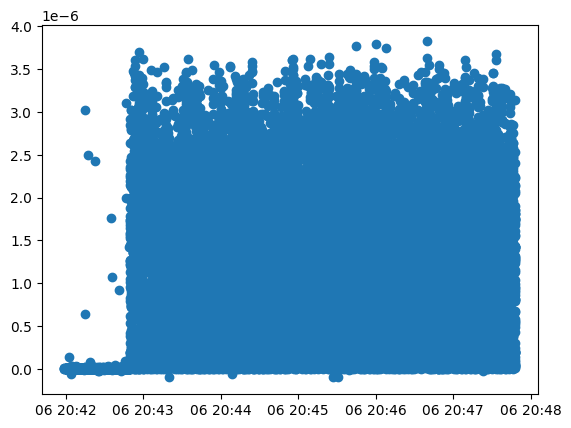

9.921750545501709


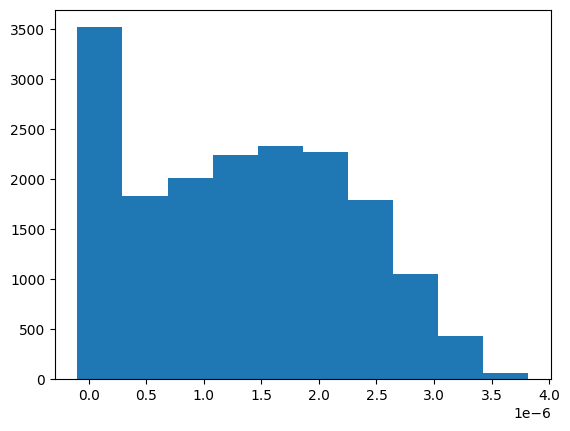

10.1833815574646
( 0.26166343688964844 )


In [3]:
benchmark(frittspath+"07220706_2041")

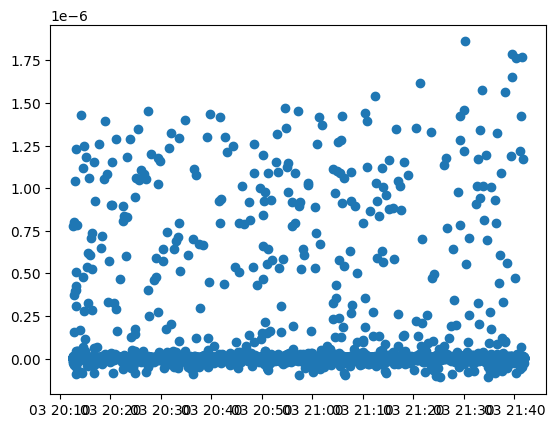

132.74903774261475


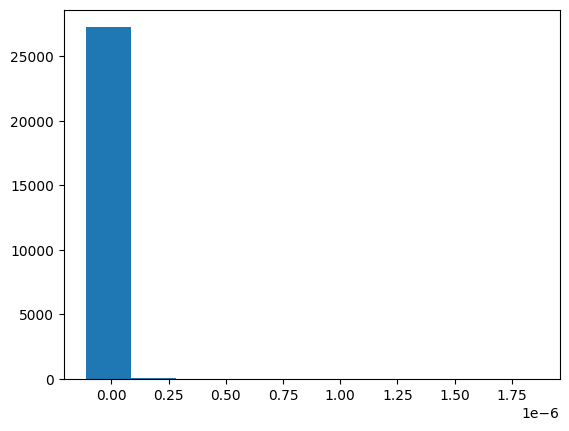

132.98481822013855
( 0.23581242561340332 )


In [4]:
benchmark(frittspath+"07220703_2012")

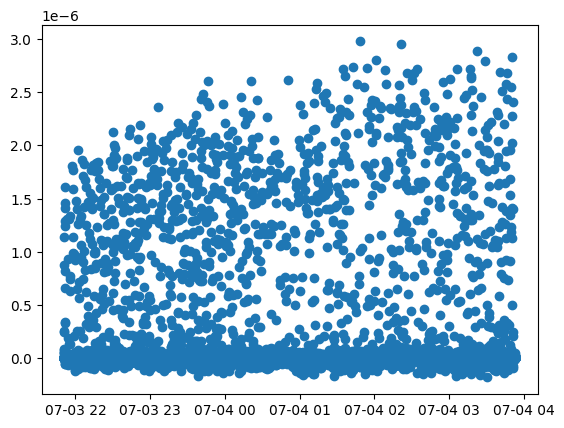

552.685355424881


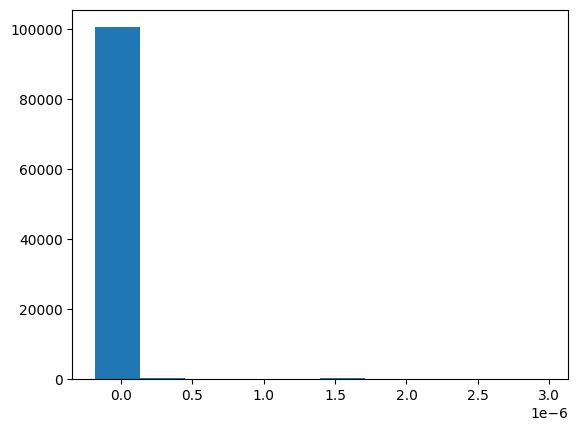

552.9225242137909
( 0.23720741271972656 )


In [5]:
benchmark(frittspath+"07220703_2151")

In [9]:
benchmark(frittspath+"07221001_2314")


KeyboardInterrupt



# Benchmarking with minimal loading
Trying to mimic ROOT's lazy loading. Keeping pandas for consistency.

In [29]:
def benchmark_min(series):
    start = time.time()
    newfilters = fittingfilters.append("EventTime")
    PTOFamps = uproot.iterate(series+"/umn_*.root:rqDir/zip1",filter_name="PTOFamps",library="pd")
    EventTime = uproot.iterate(series+"/umn_*.root:rqDir/eventTree",filter_name="EventTime",library="pd")
    lists = [[],[]]
    for a,b in zip(PTOFamps,EventTime):
        lists[0].append(a); lists[1].append(b)
    PTOFamps = pd.concat(lists[0]); EventTime = pd.concat(lists[1])
    timestamps = [dt.datetime.fromtimestamp(x) for x in EventTime["EventTime"].values]
    plt.scatter(timestamps,PTOFamps["PTOFamps"])
    plt.show()
    end = time.time()
    print(end - start)
    plt.hist(PTOFamps["PTOFamps"])
    plt.show()
    print(time.time() - start)
    print("(",time.time()-end,")")

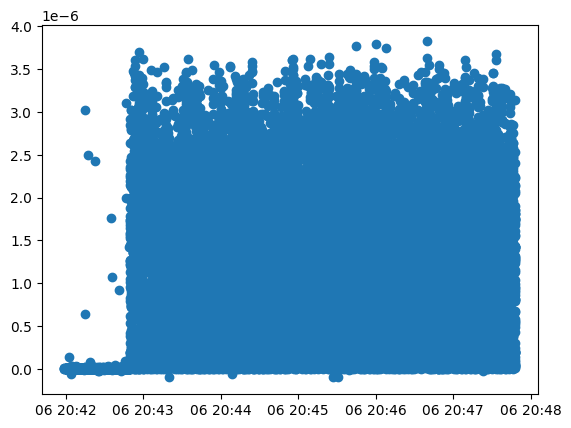

3.8184239864349365


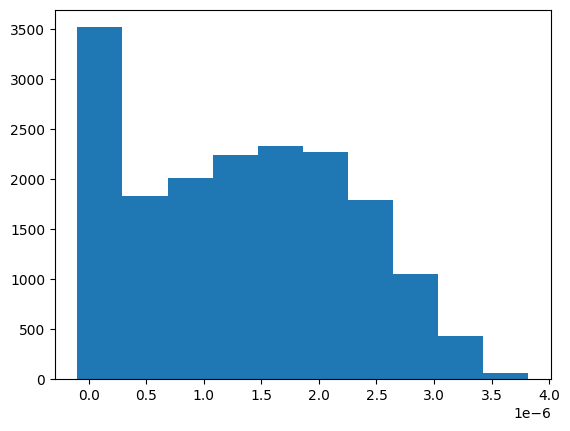

4.076253175735474
( 0.25786566734313965 )


In [30]:
benchmark_min(frittspath+"07220706_2041")

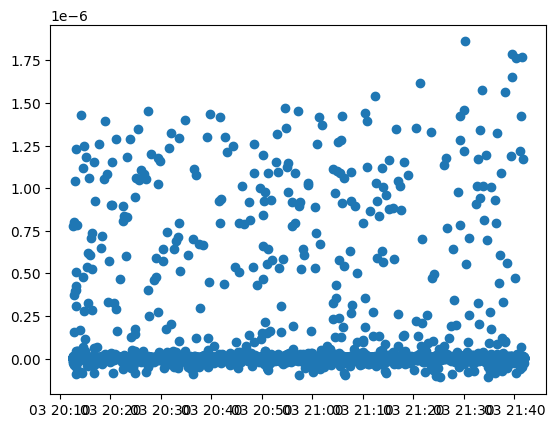

72.13675117492676


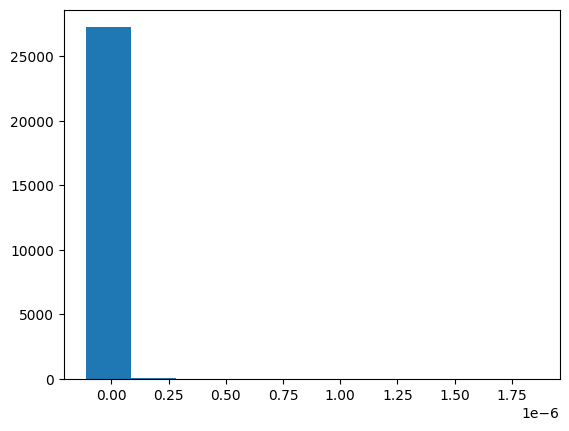

72.3860821723938
( 0.24936580657958984 )


In [31]:
benchmark_min(frittspath+"07220703_2012")

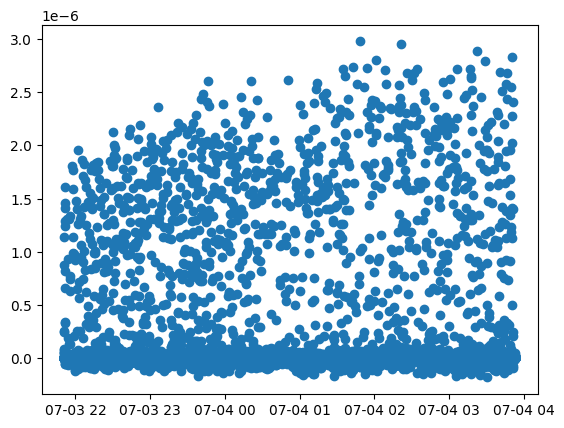

269.4874596595764


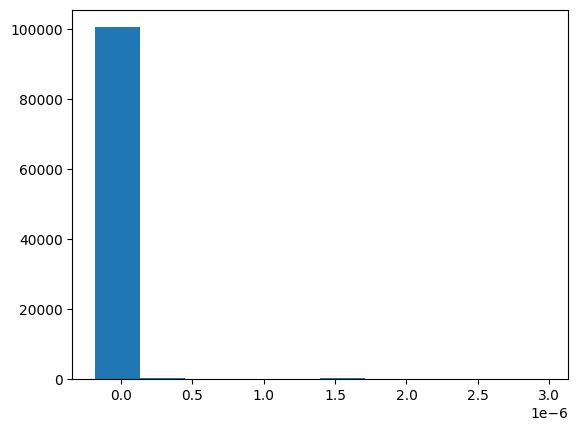

269.7176582813263
( 0.23023724555969238 )


In [32]:
benchmark_min(frittspath+"07220703_2151")

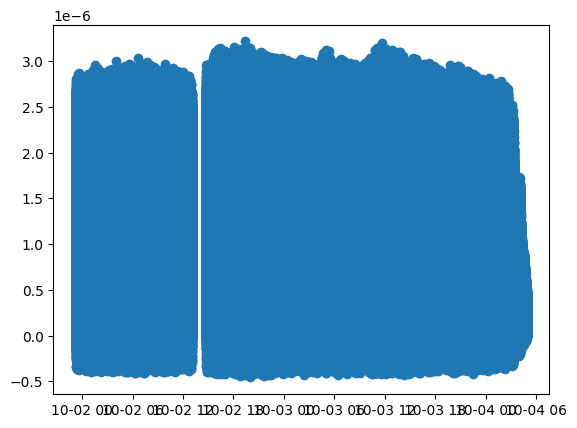

2582.5897119045258


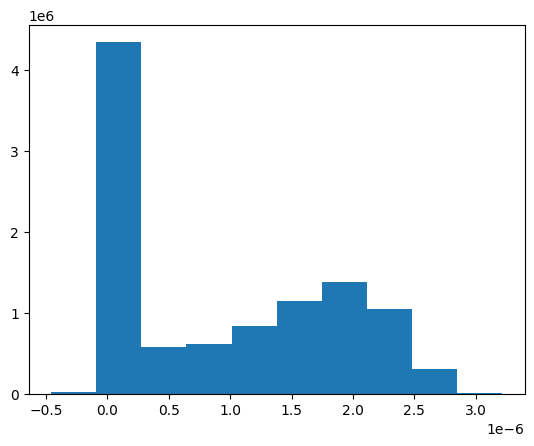

2583.038615465164
( 0.44893813133239746 )


In [33]:
benchmark_min(frittspath+"07221001_2314")